In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df=pd.read_csv(r"C:\Users\tanee\Downloads\archive (12)\parkinsons_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,6.296231,0,0,1,0,0,0,92,98,191.372707,98.730980,93.269555,161.291730,187.887925,28.634010,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,6.342325,1,0,0,0,0,0,103,96,150.188647,112.063230,47.524626,240.086616,172.325253,13.106537,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,9.740019,1,0,0,1,0,1,168,79,159.351155,61.543591,72.765698,222.231014,111.851581,26.527734,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,8.289390,0,0,0,0,0,0,129,97,232.240473,53.029891,99.945560,167.980928,144.474453,19.873404,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid


In [3]:
#Demographic Details
#Age: The age of the patients ranges from 50 to 90 years.
#Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
#Ethnicity: The ethnicity of the patients, coded as follows:
#0: Caucasian
#1: African American
#2: Asian
#3: Other
#EducationLevel: The education level of the patients, coded as follows:
#0: None
#1: High School
#2: Bachelor's
#3: Higher
#Lifestyle Factors
#BMI: Body Mass Index of the patients, ranging from 15 to 40.
#Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
#AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
#PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
#DietQuality: Diet quality score, ranging from 0 to 10.
#SleepQuality: Sleep quality score, ranging from 4 to 10.
#Medical History
#FamilyHistoryParkinsons: Family history of Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
#TraumaticBrainInjury: History of traumatic brain injury, where 0 indicates No and 1 indicates Yes.
#Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
#Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
#Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
#Stroke: History of stroke, where 0 indicates No and 1 indicates Yes.
#Clinical Measurements
#SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
#DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
#CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
#CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
#CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
#CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.
#Cognitive and Functional Assessments
#UPDRS: Unified Parkinson's Disease Rating Scale score, ranging from 0 to 19.
#MoCA: Montreal Cognitive Assessment score, ranging from 0 to 30.
#FunctionalAssessment: Functional assessment score, ranging from 0 to 10.
#Symptoms
#Tremor: Presence of tremor, where 0 indicates No and 1 indicates Yes.
#Rigidity: Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
#Bradykinesia: Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes.
#PosturalInstability: Presence of postural instability, where 0 indicates No and 1 indicates Yes.
#SpeechProblems: Presence of speech problems, where 0 indicates No and 1 indicates Yes.
#SleepDisorders: Presence of sleep disorders, where 0 indicates No and 1 indicates Yes.
#Constipation: Presence of constipation, where 0 indicates No and 1 indicates Yes.
#Diagnosis Information
#Diagnosis: Diagnosis status for Parkinson's Disease, where 0 indicates No and 1 indicates Yes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [5]:
df.isnull().any()

PatientID                   False
Age                         False
Gender                      False
Ethnicity                   False
EducationLevel              False
BMI                         False
Smoking                     False
AlcoholConsumption          False
PhysicalActivity            False
DietQuality                 False
SleepQuality                False
FamilyHistoryParkinsons     False
TraumaticBrainInjury        False
Hypertension                False
Diabetes                    False
Depression                  False
Stroke                      False
SystolicBP                  False
DiastolicBP                 False
CholesterolTotal            False
CholesterolLDL              False
CholesterolHDL              False
CholesterolTriglycerides    False
UPDRS                       False
MoCA                        False
FunctionalAssessment        False
Tremor                      False
Rigidity                    False
Bradykinesia                False
PosturalInstab

In [6]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,0.145843,0.106413,0.145843,0.148219,0.205226,0.048931,133.719715,90.249881,226.860840,126.147858,59.670352,222.940500,101.415318,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,0.353033,0.308439,0.353033,0.355401,0.403962,0.215775,26.502355,17.061488,43.589406,43.407036,23.370920,101.895822,56.591448,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.062698,50.022828,20.027981,50.113604,0.028441,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,75.000000,189.385178,88.841960,39.538643,132.520174,53.048148,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,228.528256,126.884570,59.343357,222.802452,102.561023,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,264.608100,163.912782,79.366628,311.699109,149.831682,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.duplicated()
df.drop_duplicates()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,6.296231,0,0,1,0,0,0,92,98,191.372707,98.730980,93.269555,161.291730,187.887925,28.634010,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,6.342325,1,0,0,0,0,0,103,96,150.188647,112.063230,47.524626,240.086616,172.325253,13.106537,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,9.740019,1,0,0,1,0,1,168,79,159.351155,61.543591,72.765698,222.231014,111.851581,26.527734,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,8.289390,0,0,0,0,0,0,129,97,232.240473,53.029891,99.945560,167.980928,144.474453,19.873404,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid


In [8]:
df.shape

(2105, 35)

In [9]:
X_grouped=df.drop(["DoctorInCharge","PatientID"],axis=1)
X_grouped.groupby("Diagnosis").mean()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
Diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,68.635456,0.481898,0.699126,1.332085,26.932601,0.293383,9.774184,4.968954,4.997137,7.093457,0.139825,0.097378,0.151061,0.122347,0.174782,0.041199,133.868914,90.882647,227.917357,125.333531,60.255434,220.911515,72.683695,17.002809,5.831890,0.258427,0.149813,0.112360,0.073658,0.302122,0.250936,0.282147
1,70.195552,0.499233,0.688650,1.340491,27.379577,0.298313,10.203948,5.045987,4.861158,6.937167,0.149540,0.111963,0.142638,0.164110,0.223926,0.053681,133.628067,89.861196,226.211859,126.648069,59.310957,224.186832,119.064114,13.921994,4.472364,0.538344,0.315951,0.266104,0.178681,0.290644,0.241564,0.305982


Text(0.5, 1.0, 'Diagnosed')

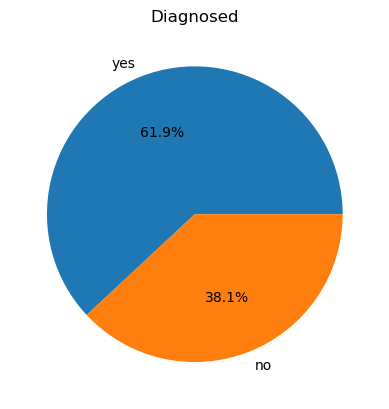

In [10]:
p1=df["Diagnosis"].value_counts()[1]
p2=df["Diagnosis"].value_counts()[0]
pie_counts=[p1,p2]
pie_labels=["yes","no"]
plt.pie(pie_counts,labels=pie_labels,autopct='%1.1f%%')
plt.title("Diagnosed")

DATA SLIGHTLY DOMINATED BY DIAGNOSED ENTRIES


<Axes: xlabel='Age', ylabel='Count'>

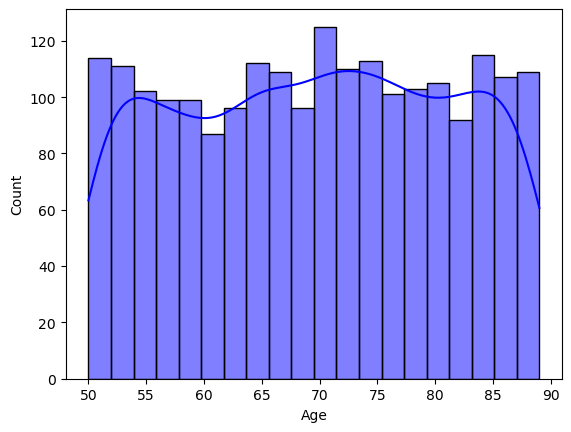

In [11]:
sb.histplot(df["Age"],kde="true",color="blue",bins=20)

DATA RANGES FROM AGES 50 TO 90

<Axes: xlabel='Gender', ylabel='percent'>

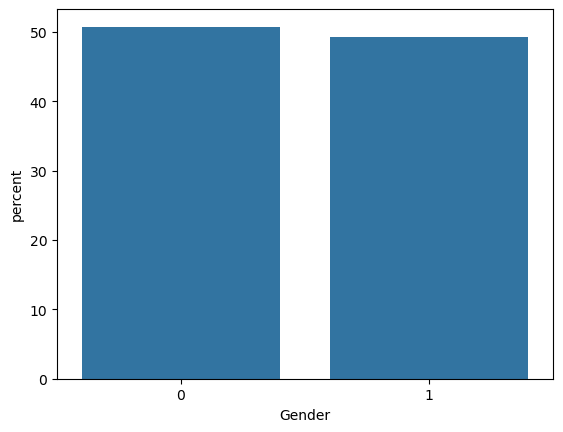

In [12]:
sb.countplot(df,x="Gender",stat="percent")

EQUAL DISTRIBUTION OF DATA BETWEEN BOTH OF THE GENDERS

<Axes: xlabel='Diagnosis', ylabel='count'>

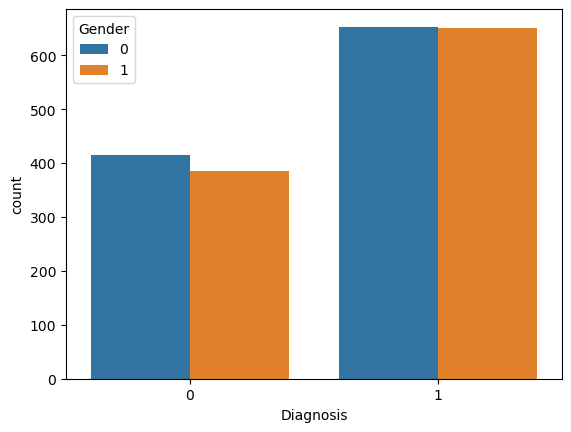

In [13]:
sb.countplot(df,x="Diagnosis",hue="Gender")

ALMOST EQUAL ENTRIES OF DIAGNOSED PATIENTS BASED ON GENDER

<Axes: xlabel='Diagnosis', ylabel='count'>

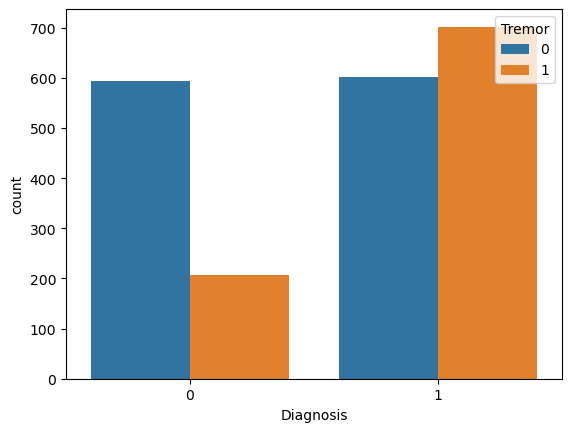

In [14]:
sb.countplot(df,x="Diagnosis",hue="Tremor")

MOST OF THE DIAGNOSED PATIENTS SHOW SIGNS OF TREMOR

In [15]:
x_diagnosed=df.loc[df['Diagnosis'] == 1]
x_not_diagnosed=df.loc[df['Diagnosis'] == 0]
x_diagnosed

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
7,3065,70,1,0,0,36.758282,1,19.988866,3.891749,3.421960,7.895866,0,0,0,1,0,0,129,99,185.203703,67.924443,25.027643,390.344399,181.172565,11.065216,1.190611,1,0,0,1,0,0,1,1,DrXXXConfid
8,3066,80,0,2,1,22.380587,1,7.293288,2.595670,4.784827,4.170470,0,0,0,1,0,0,133,113,274.970149,187.263282,44.393227,214.604591,178.261521,10.936604,3.438111,0,0,0,0,0,0,0,1,DrXXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,5156,88,1,2,1,19.805534,0,18.604330,1.826044,5.456645,5.169897,0,0,0,0,1,0,97,80,227.886176,141.850484,82.514353,50.119713,58.196612,25.224626,0.793003,0,0,0,0,1,0,0,1,DrXXXConfid
2099,5157,71,1,0,1,31.341888,0,3.434399,2.614193,2.786705,4.615461,0,0,0,0,0,1,116,94,180.373219,118.628743,59.452737,377.691732,110.434627,0.762763,9.018642,0,0,1,1,0,0,0,1,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,6.342325,1,0,0,0,0,0,103,96,150.188647,112.063230,47.524626,240.086616,172.325253,13.106537,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,9.740019,1,0,0,1,0,1,168,79,159.351155,61.543591,72.765698,222.231014,111.851581,26.527734,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid


<Axes: xlabel='FunctionalAssessment', ylabel='Count'>

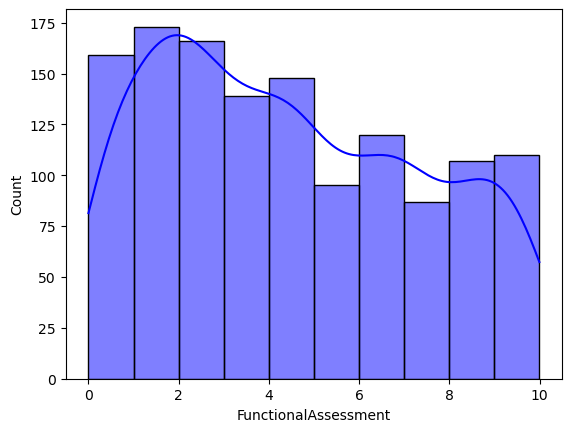

In [16]:
sb.histplot(x_diagnosed["FunctionalAssessment"],kde="true",color="blue",bins=10)

<Axes: xlabel='FunctionalAssessment', ylabel='Count'>

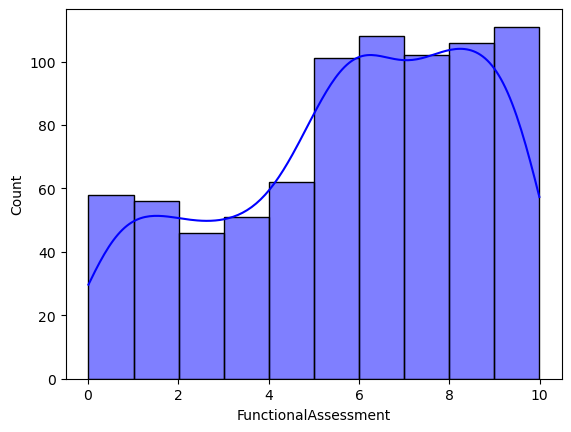

In [17]:
sb.histplot(x_not_diagnosed["FunctionalAssessment"],kde="true",color="blue",bins=10)

FUNCTIONAL ASSESSMENT SCORE IS BETWEEN 0 TO 5 FOR MAJORITY OF DIAGNOSED PATIENTS 

<Axes: xlabel='UPDRS', ylabel='Count'>

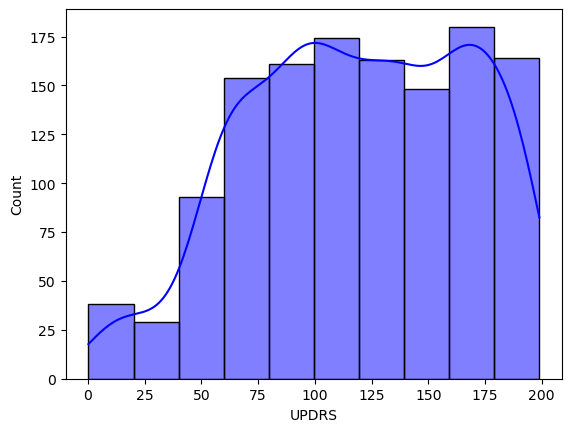

In [18]:
sb.histplot(x_diagnosed["UPDRS"],kde="true",color="blue",bins=10)

<Axes: xlabel='UPDRS', ylabel='Count'>

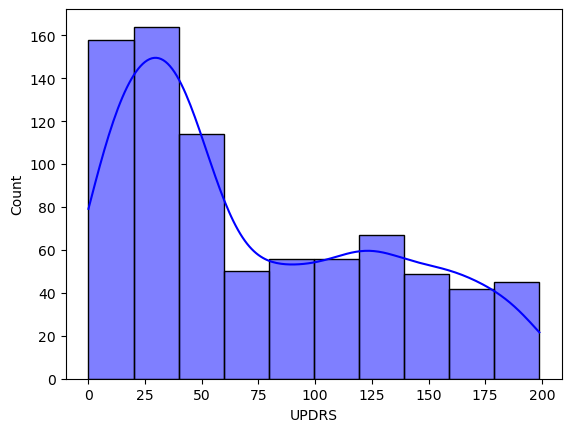

In [19]:
sb.histplot(x_not_diagnosed["UPDRS"],kde="true",color="blue",bins=10)

<Axes: xlabel='MoCA', ylabel='Count'>

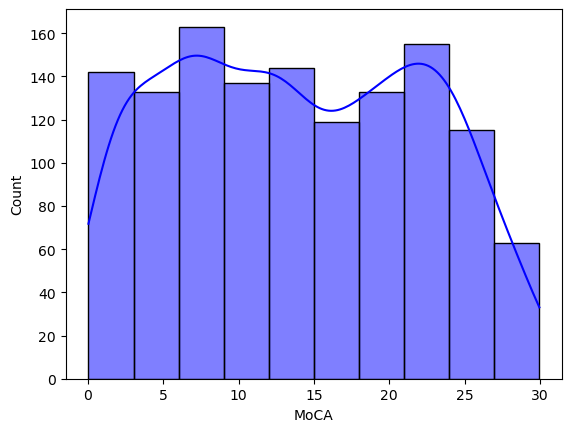

In [20]:
sb.histplot(x_diagnosed["MoCA"],kde="true",color="blue",bins=10)

<Axes: xlabel='MoCA', ylabel='Count'>

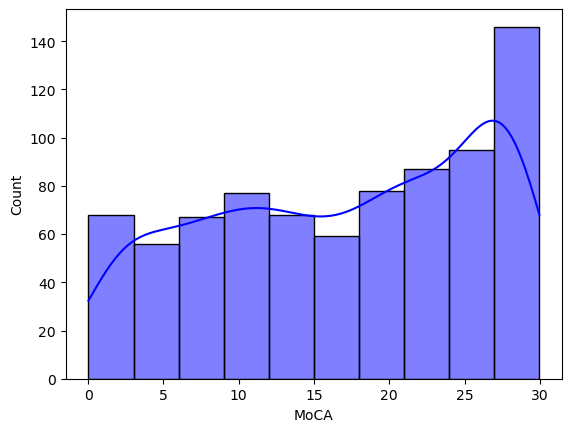

In [21]:
sb.histplot(x_not_diagnosed["MoCA"],kde="true",color="blue",bins=10)

<Axes: >

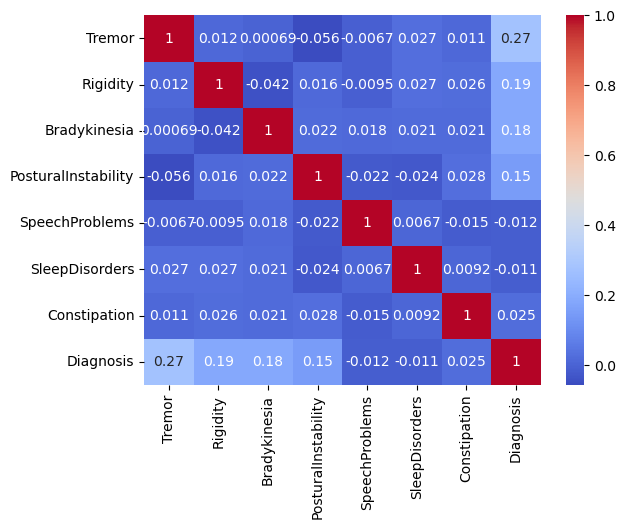

In [22]:
X_corr1=df.iloc[:,-9:-1]
correlation_matrix=X_corr1.corr()
sb.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

TRAINING DATA

In [23]:
X=df.drop(["Diagnosis","DoctorInCharge","PatientID"],axis=1)
Y=df["Diagnosis"]

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

DECISION TREE

In [25]:
decision=tree.DecisionTreeClassifier()

In [26]:
decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [27]:
y_pred0=decision.predict(X_train)
y_pred0_test=decision.predict(X_test)

In [28]:
accuracy_score(Y_train,y_pred0)

1.0

In [29]:
accuracy_score(Y_test,y_pred0_test)

0.8815165876777251

RANDOM FOREST

In [30]:
classifier=RandomForestClassifier()

In [31]:
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [32]:
y_pred=classifier.predict(X_train)
y_pred_test=classifier.predict(X_test)

In [33]:
accuracy_score(Y_train,y_pred)

1.0

In [52]:
accuracy_score(Y_test,y_pred_test)

0.9289099526066351

LOGISTIC REGRESSION

In [35]:
regressor=LogisticRegression(max_iter=5000)
regressor.fit(X_train,Y_train)

LogisticRegression(max_iter=5000)

In [36]:
y_pred1=regressor.predict(X_train)
y_pred_test1=regressor.predict(X_test)

In [37]:
accuracy_score(Y_train,y_pred1)

0.8231256599788807

In [51]:
accuracy_score(Y_test,y_pred_test1)

0.8009478672985783

NAIVE BAYES

In [39]:
nb=GaussianNB()

In [40]:
nb.fit(X_train,Y_train)

GaussianNB()

In [41]:
y_pred2=nb.predict(X_train)
y_pred2_test=nb.predict(X_test)

In [42]:
accuracy_score(Y_train,y_pred2)

0.7983104540654699

In [53]:
accuracy_score(Y_test,y_pred2_test)

0.7962085308056872

KNN

In [44]:
knc = KNeighborsClassifier()

In [45]:
knc.fit(X_train,Y_train)

KNeighborsClassifier()

In [46]:
y_pred3=knc.predict(X_train)
y_pred3_test=knc.predict(X_test)

In [47]:
accuracy_score(Y_train,y_pred3)

0.793558606124604

In [55]:
accuracy_score(Y_test,y_pred3_test)

0.7298578199052133

In [58]:
accuracy=accuracy_score(Y_test,y_pred_test)
accuracy1=accuracy_score(Y_test,y_pred_test1)
accuracy2=accuracy_score(Y_test,y_pred2_test)
accuracy3=accuracy_score(Y_test,y_pred3_test)

